## Task 2:
You are playing a heated game of Dungeons & Dragons and the dungeon master's (DM) main character always attacks you with two weapons (one die each). 
You would like to know what type of weapons they are and could guess, if you knew the individual damage rolls, but the DM only gives you the sum of the rolled values. You know it has to be either a d6, d8, d10, or d12 (dX = X-sided die) for either weapon and the DM always rolls two at the same time and gives you the sum. Your hypothesis would be that it is a d6 and a d10. What is the evidence for this hypothesis if the last 5 throws gave you the summed numbers [10, 12, 15, 4, 7]

In [1]:
# prepare the likelihoods to be sampled via Monte-Carlo

likelihood_mc = {'6+6'  : {}, 
                 '6+8'  : {}, 
                 '6+10' : {}, 
                 '6+12' : {}, 
                 '8+8'  : {}, 
                 '8+10' : {}, 
                 '8+12' : {}, 
                 '10+10': {}, 
                 '10+12': {}, 
                 '12+12': {}}

for key in likelihood_mc.keys():
    tmp = {}
    for i in range(25):
        tmp[i] = 0
    likelihood_mc[key] = tmp

In [2]:
# do Monte-Carlo sampling

import re
import random

pattern = '[0-9]+'
N = 5000

for lkey in likelihood_mc.keys():
    dice = list(map(lambda x : int(x), re.findall(pattern, lkey)))
    freqs = likelihood_mc[lkey]
    for _ in range(N):
        num = random.randint(1, dice[0]) + random.randint(1, dice[1])
        freqs[num] = freqs[num] + 1
    for fkey in freqs.keys():
        freqs[fkey] = freqs[fkey] / N
    likelihood_mc[lkey] = freqs

In [9]:
# incoming data = [10, 12, 15, 4, 7]
# possible combinations: 6+6, 6+8, 6+10, 6+12, 8+8, 8+10, 8+12, 10+10, 10+12, 12+12

keys = list(likelihood_mc.keys())

# get normalising constant for current datapoint
def nc(datapoint, prior):
    res = 0
    for i in range(len(keys)):
        res += prior[i] * likelihood_mc[keys[i]][datapoint]
    return res


# obtain posterior according to formula
def posterior(prior, datapoint):
    res = []
    for i in range(len(keys)):
        res.append((prior[i] * likelihood_mc[keys[i]][datapoint]) / nc(datapoint, prior))
    return res

In [10]:
data = [10, 12, 15, 4, 7]

prior = [1/10 for _ in range(10)] # uniform prior

for datapoint in data:
    p = posterior(prior, datapoint)
    prior = p

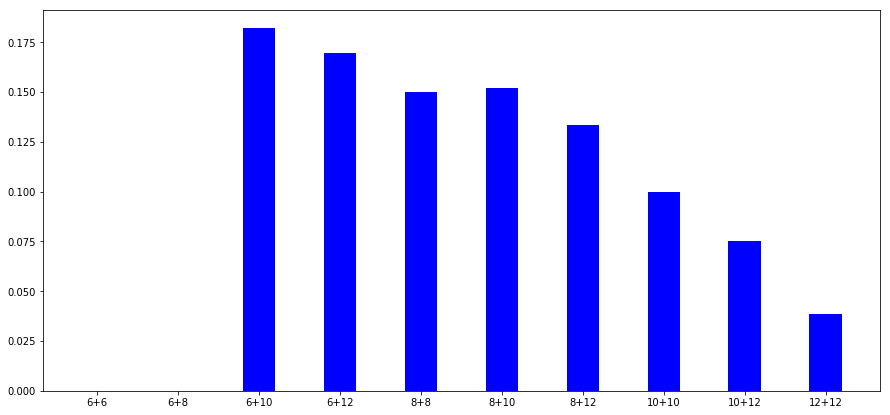

In [11]:
import matplotlib.pyplot as plt

x = ['6+6', '6+8', '6+10', '6+12', '8+8', '8+10', '8+12', '10+10', '10+12', '12+12']

plt.figure(figsize=(15,7))

ax = plt.subplot()
ax.bar(x, prior, width=0.4, color='b', align='center')

plt.show()